In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the necessary packages**

In [ ]:
import numpy as np 
import pandas as pd
import os
from sklearn.metrics import *
from sklearn.preprocessing import LabelBinarizer
import keras
from keras import backend as K
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.callbacks import *

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,MaxPool2D,GlobalAveragePooling2D
 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
import cv2

**Reading the image files**

In [ ]:
dire='/content/drive/MyDrive/Colab Notebooks/flower recognition/data'
categories=['dandelion', 'daisy', 'sunflowers', 'tulips', 'roses']


In [ ]:

features=[]
for i in categories:
    path=os.path.join(dire,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])

In [ ]:
X=[]
y=[]
for i,j in features:
    X.append(i)
    y.append(j)

**Example of flower images per class**

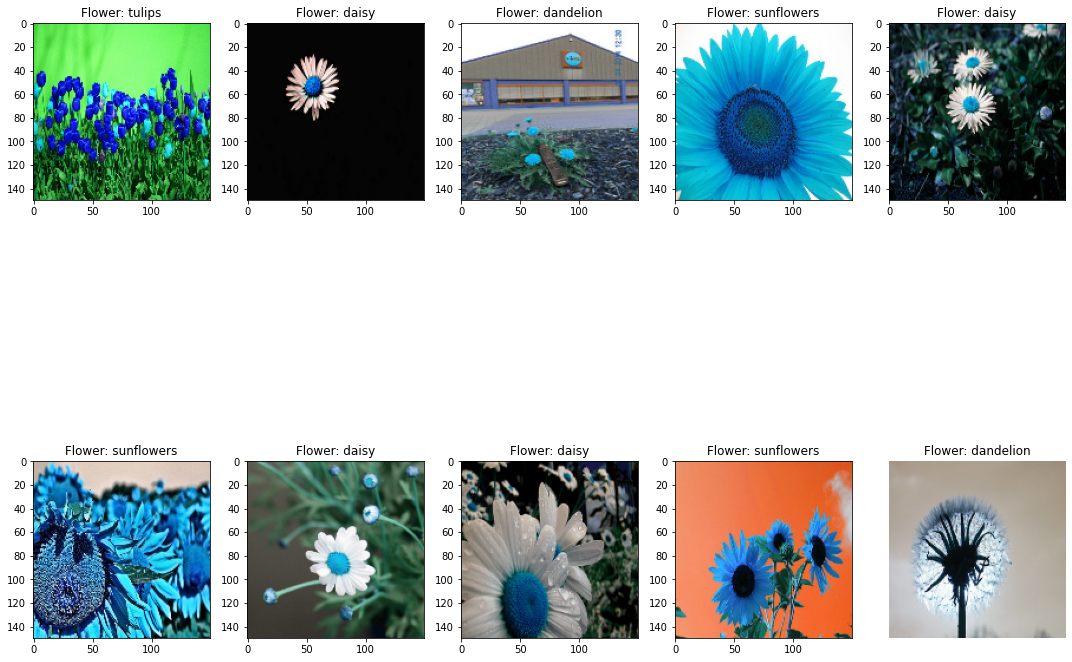

In [ ]:
fig,ax=plt.subplots(2,5)
fig.set_size_inches(15,15)
for i in range(2):
    for j in range (5):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+categories[y[l]])
plt.axis('off')        
plt.tight_layout()

Reshaping and normalizing: the need of resizing the feature vetcor x is to meet the keras requirement and normalization is done to scale all the values in a similar range¶


In [ ]:
X=np.array(X).reshape(-1,150,150,3)/255.0

**Class destribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


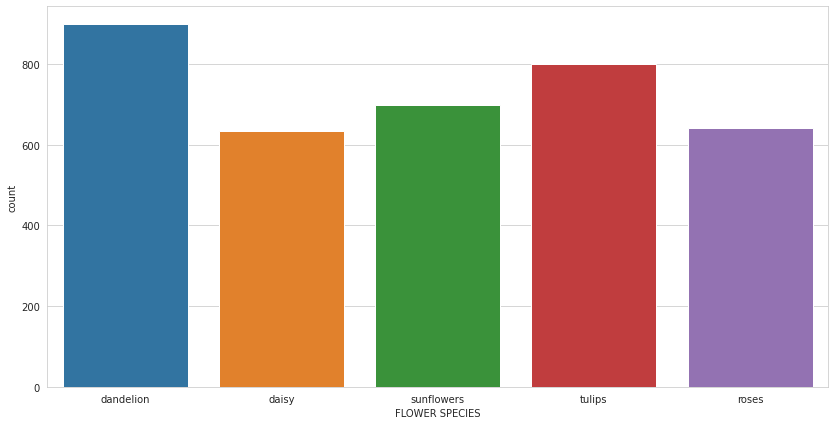

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
fig=sns.countplot(y)
fig.set(xticks=range(len(categories)), xticklabels=[i for i in categories])
plt.xlabel('FLOWER SPECIES')
plt.show()

In [ ]:
list_dandelion=len([i for i in y if i==0])
list_daisy=len([i for i in y if i==1])
list_sunflower=len([i for i in y if i==2])
list_tulip=len([ i for i in y if i==3])
list_rose=len([i for i in y if i==4])
list_species=[list_dandelion,list_daisy,list_sunflower,list_tulip,list_rose]

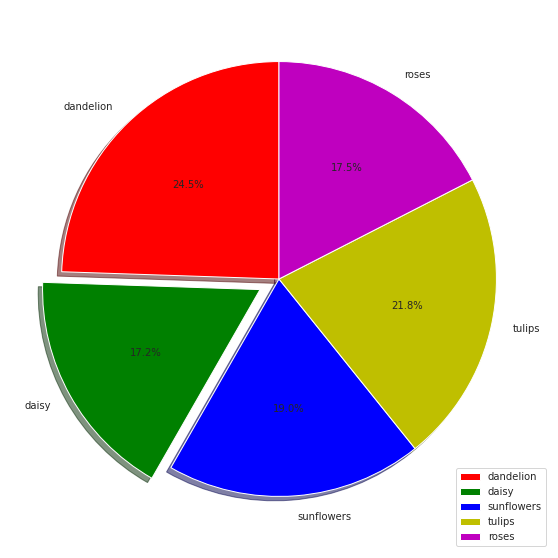

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
plt.pie(list_species,labels=categories,startangle=90,colors=['r','g','b','y','m'],autopct='%1.1f%%',explode = (0, 0.1, 0, 0,0),shadow=True)
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)


**CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))


**Augmentation to avoid overfitting**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                        

In [ ]:
!pip3 install ann_visualizer
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ann_visualizer.visualize import ann_viz
from graphviz import Source

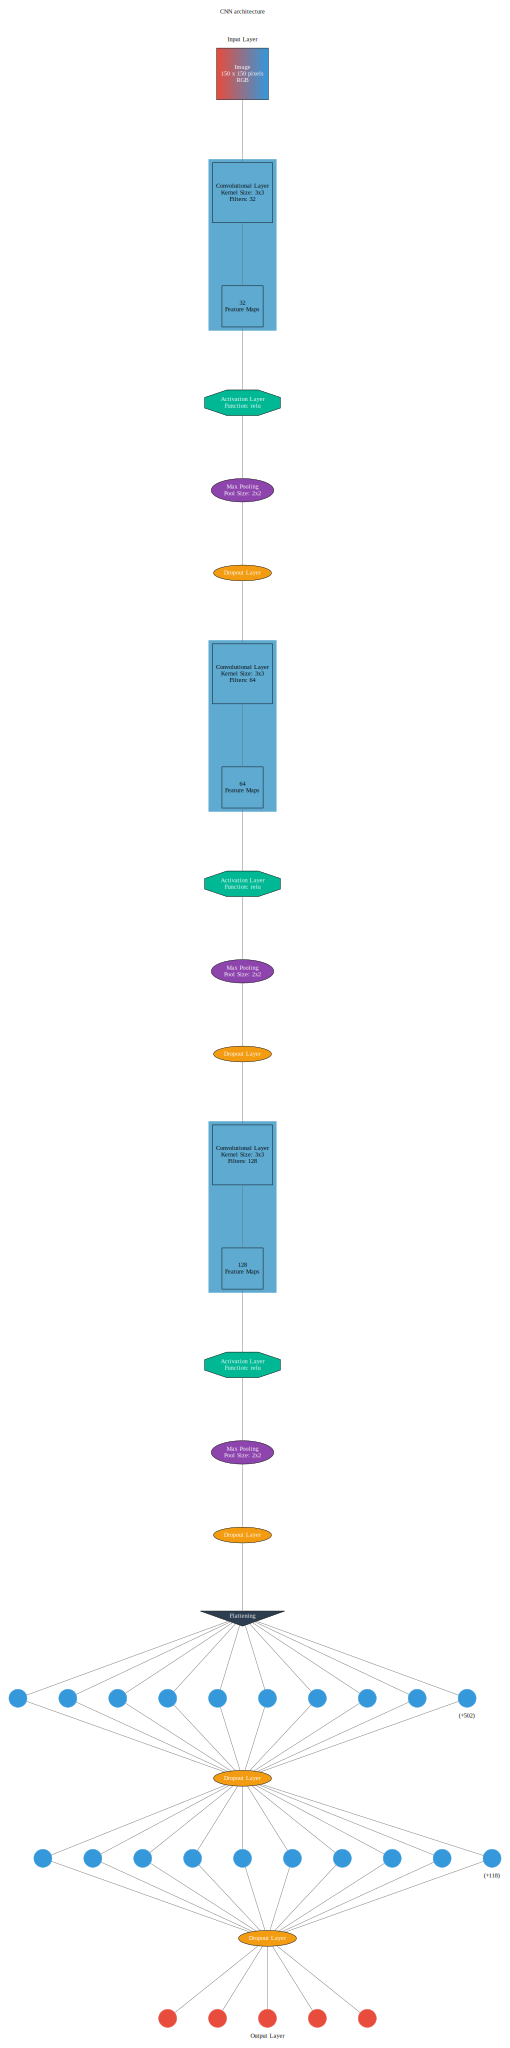

In [ ]:
ann_viz(model, view=True, title="CNN architecture")
Source.from_file('network.gv')

In [ ]:
keras.backend.clear_session()
#callback function for early stopping
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>99.99):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()

In [ ]:
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/flower recognition/cnn.h5'
epochs=50

callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=15, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint(monitor='val_loss', mode='min', filepath=checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False),
    acc_callback
]

In [ ]:
CNN_history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = epochs, validation_data = (x_test,y_test),
                              callbacks=callbacks,
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 1.8743 - accuracy: 0.2482
Epoch 1: val_loss improved from inf to 1.55164, saving model to /content/drive/MyDrive/Colab Notebooks/flower recognition/cnn.h5
22/22 [==============================] - 29s 882ms/step - loss: 1.8743 - accuracy: 0.2482 - val_loss: 1.5516 - val_accuracy: 0.2602 - lr: 0.0010
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 1.4311 - accuracy: 0.3618
Epoch 2: val_loss improved from 1.55164 to 1.26955, saving model to /content/drive/MyDrive/Colab Notebooks/flower recognition/cnn.h5
22/22 [==============================] - 15s 689ms/step - loss: 1.4311 - accuracy: 0.3618 - val_loss: 1.2696 - val_accuracy: 0.4537 - lr: 0.0010
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 1.2485 - accuracy: 0.4512
Epoch 3: val_loss improved from 1.26955 to 1.17535, saving model to /content/drive/MyDrive/Colab Notebooks/flower recognition/cnn.h5
22/22 [==========================

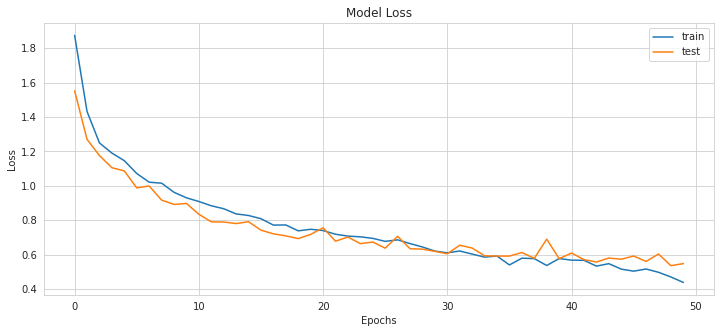

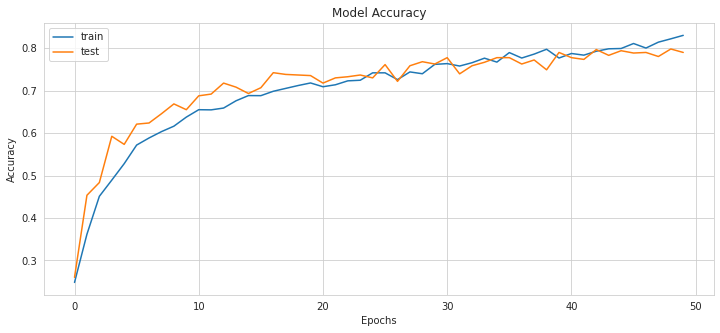

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
preds=model.predict(x_test)
predictions=np.argmax(preds,axis=1)


23/23 [==============================] - 0s 12ms/step


In [ ]:
from sklearn.metrics import classification_report
Y_test =np.argmax(y_test,axis=1)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       186
           1       0.84      0.79      0.81       121
           2       0.73      0.88      0.80       138
           3       0.82      0.66      0.74       155
           4       0.71      0.78      0.74       134

    accuracy                           0.79       734
   macro avg       0.79      0.79      0.79       734
weighted avg       0.80      0.79      0.79       734



In [ ]:
def report_generate(Y_test, predictions):
  report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = predictions, output_dict=True)).transpose()
  report = report.rename(index={'0': 'dandelion','1':'daisy','2':'sunflowers','3':'tulips', '4':'roses'})
  report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
  report=report.drop(["support"],axis=1)
  columns = ['precision','recall','f1-score']
  report.columns = columns
  plt = report.plot(kind='bar',figsize=(12,6))
  
  plot=plt.tick_params(rotation=40)
  
  return plot,report

(None,               precision  recall  f1-score
 dandelion         84.78   83.87     84.32
 daisy             84.07   78.51     81.20
 sunflowers        73.49   88.41     80.26
 tulips            82.40   66.45     73.57
 roses             71.23   77.61     74.29
 accuracy          79.02   79.02     79.02
 macro avg         79.20   78.97     78.73
 weighted avg      79.57   79.02     78.94)

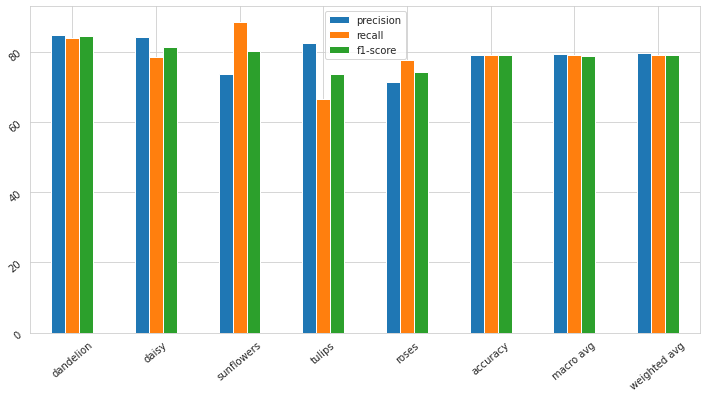

In [ ]:
report_generate(Y_test, predictions)

In [ ]:
#confusion matrix
def conf_matrix(Y_test, y_pred):

  cm = confusion_matrix(Y_test, y_pred) 
# Transform to df for easier plotting
  
  cm_df = pd.DataFrame(cm,
                       index = ['dandelion', 'daisy', 'sunflowers', 'tulips', 'roses'], 
                       columns = ['dandelion', 'daisy', 'sunflowers', 'tulips', 'roses'])
  plt.figure(figsize=(10,7))
  sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.xticks(rotation = 45)
  plt.yticks(rotation = 45)
  plt.show()
  plt.close()

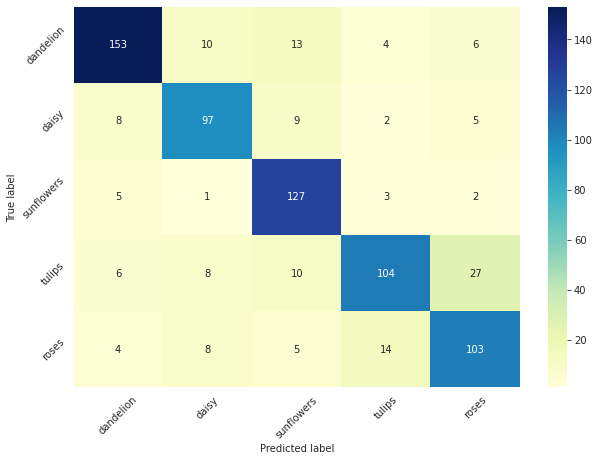

In [ ]:
conf_matrix(Y_test,predictions)

ROC AUC score: 0.8729660506166317


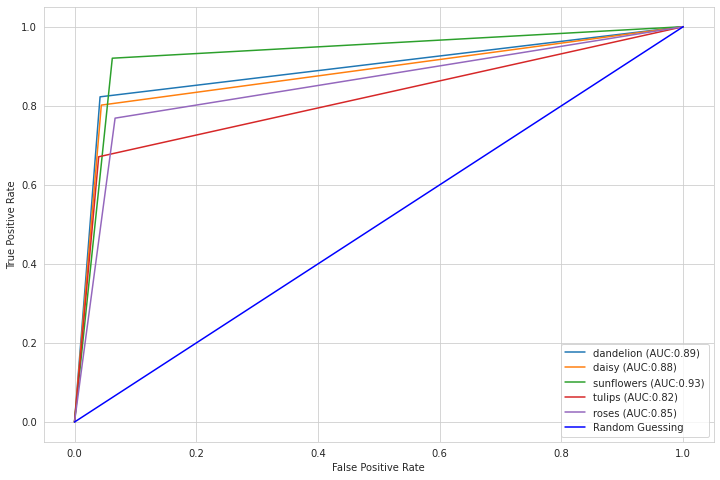

In [ ]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(Y_test,predictions))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


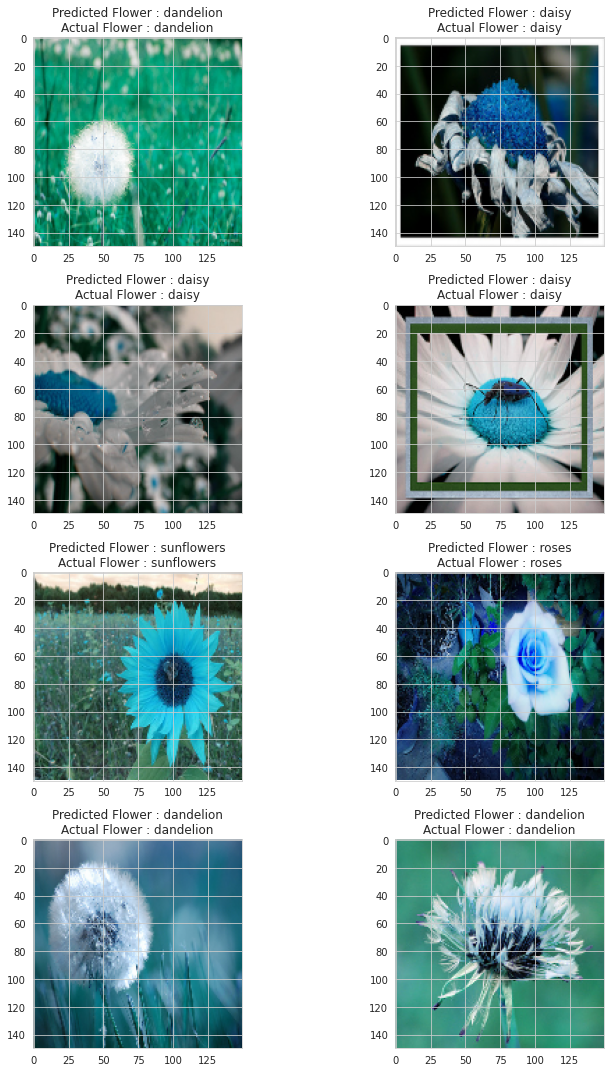

In [ ]:
correct_class=[]
incorrect_class=[]
i=0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==predictions[i]):
        correct_class.append(i)
    if(len(correct_class)==8):
        break

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[correct_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ categories[predictions[correct_class[count]]] +"\n"+"Actual Flower : "+ categories[np.argmax(y_test[correct_class[count]])])
        plt.tight_layout()
        count+=1

In [ ]:
i=0
for i in range(len(y_test)):
    
    if (np.argmax(y_test[i])!=predictions[i]):
        
        incorrect_class.append(i)
    if (len(incorrect_class)==8):
        break


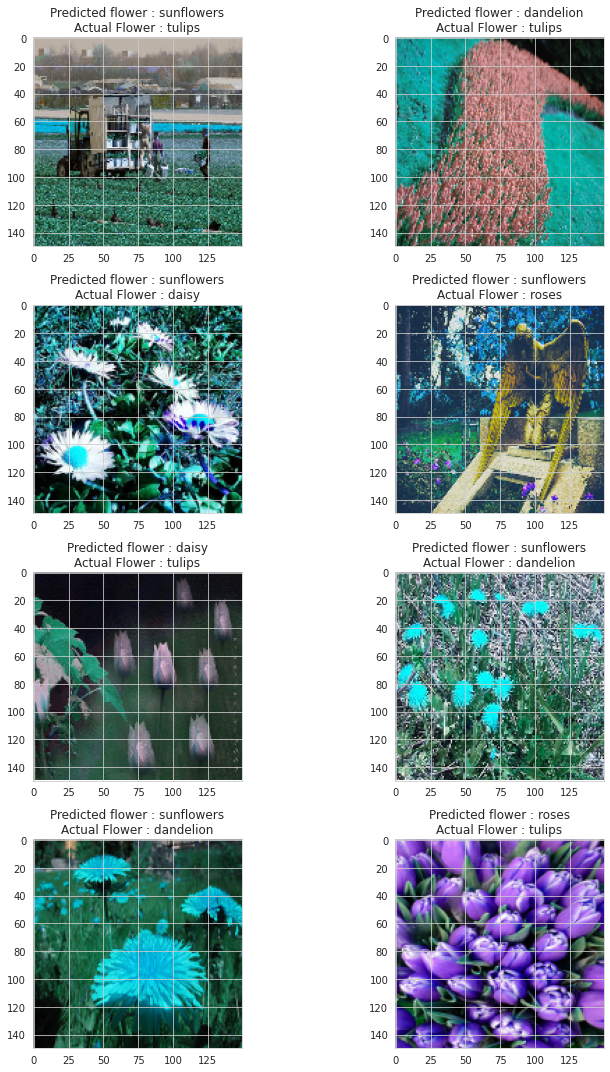

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(x_test[incorrect_class[count]])
        ax[i,j].set_title("Predicted flower : " + categories[predictions[incorrect_class[count]]] + "\n"+"Actual Flower : " +categories[np.argmax(y_test[incorrect_class[count]])])
        plt.tight_layout()
        count+=1

In [ ]:
import requests
from PIL import Image
from io import BytesIO

def process_image(url):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    fix,ax=plt.subplots(1,3,figsize=(15,20))
    ax[0].imshow(img)
    ax[0].set_title('image')
    
    #grayscale and normalization
    img=np.array(img)
    img=cv2.cvtColor(img,cv2.IMREAD_COLOR)
    print(img.shape)
    img=img/255.0
    ax[1].imshow(img)
    ax[1].set_title('color image')
    
    #resizing
    img=cv2.resize(img,(150,150))
    print(img.shape)
    ax[2].imshow(img)
    ax[2].set_title('predicted image')
    plt.tight_layout()
    img=np.expand_dims(img,axis=0)
    #making it model ready
    
    print(img.shape)
    return img


    
def predict(url):
    img=process_image(url)
    label=model.predict(img)
    final_1=np.argmax(label,axis=1)[0]
    plt.xlabel(categories[final_1])
    return categories[final_1]


(900, 600, 3)
(150, 150, 3)
(1, 150, 150, 3)
1/1 [==============================] - 0s 19ms/step


'tulips'

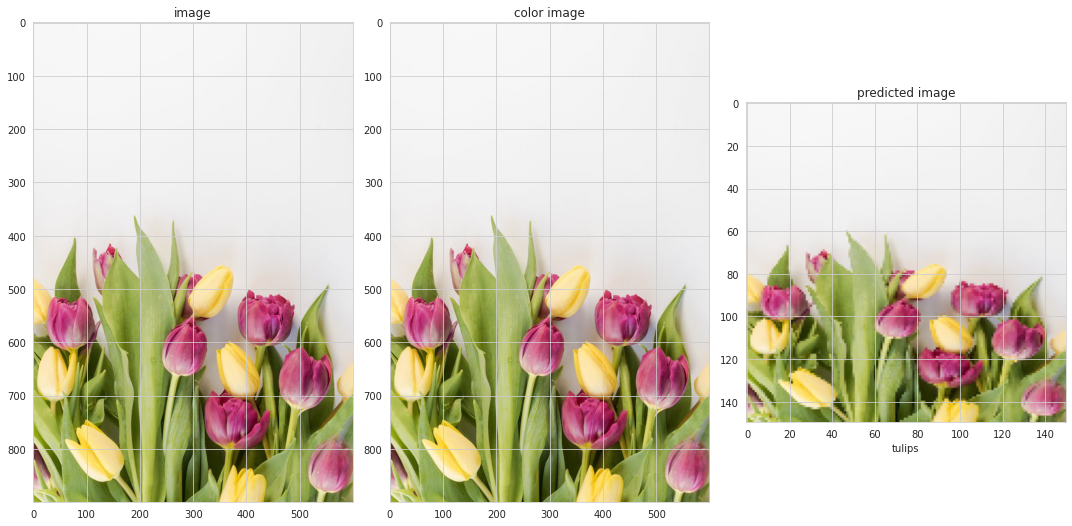

In [ ]:
predict("https://images.pexels.com/photos/1883385/pexels-photo-1883385.jpeg?auto=compress&cs=tinysrgb&w=600")